# Linear Model in Tensorflow

Do to repeated failures in constructing networks capable of learning in Tensorflow, I have decided it would be best to ensure the most basic of functions can indeed learn. After recollecting on a variety of times in the past I have implemented Tensorflow, I came to the conclusion that tasks both difficult and trivial ended in defeat. I now believe some fundamental element of the learning process may be missing, and intend to investigate what that may be. 

The code below was written by myself in dependence on numerous Tensorflow tutorials and edited to implement a sine curve, which failed to learn the correct weights. 

I must investigate two factors in this failure:
First, did I do something wrong in the code? This will be partially ameloriated by testing a simpler model and ensure that the nuts and bolts of the process are in fact correct. Second, I must ensure that my rudimentary mathematical skills did not lead me astray in the construction of the code. 

In [27]:
!pip install alive-progress

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time
import sys
#from alive_progress import alive_bar

In [12]:
model.trainable_variables

(<tf.Variable 'b1:0' shape=(1,) dtype=float32, numpy=array([-1.689881], dtype=float32)>,
 <tf.Variable 'b2:0' shape=(1,) dtype=float32, numpy=array([-0.86635095], dtype=float32)>,
 <tf.Variable 'b1:0' shape=(1,) dtype=float32, numpy=array([0.48726445], dtype=float32)>,
 <tf.Variable 'b2:0' shape=(1,) dtype=float32, numpy=array([-0.7721464], dtype=float32)>)

In [49]:
x = np.linspace(0, 100, 1000)

A = np.random.uniform()
B = np.random.uniform()
C = np.random.uniform()
D = np.random.uniform()

y = A*np.sin((B*x) + C) + D

x = tf.constant(x.astype('float32'))
y = tf.constant(y.astype('float32'))

In [50]:
for xi, yi in zip(x, y):
    print(xi, yi)
    break

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(1.3070455, shape=(), dtype=float32)


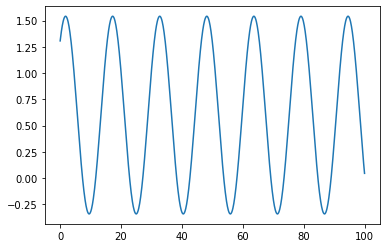

In [51]:
plt.plot(x,y)

In [58]:
# x = np.linspace(0, 100, 1000)

# A = np.random.uniform()
# B = np.random.uniform()
# C = np.random.uniform()
# D = np.random.uniform()

# y = A*np.sin((B*x) + C) + D

# x = tf.constant(x.astype('float32'))
# y = tf.constant(y.astype('float32'))
# #print(x, y)

# fig, ax = plt.subplots(2,1)

# ax[0].scatter(x, y)

class Addition(tf.Module):
    def __init__(self, inputs, name=None):
        super().__init__(name=name)
        self.b_1 = tf.Variable(tf.random.normal([inputs]), name='b1')
        self.b_2 = tf.Variable(tf.random.normal([inputs]), name='b2')
    def __call__(self, x):
        out = tf.math.multiply(x, self.b_1) + self.b_2
        return out

class Sinusoid(tf.Module):
    def __init__(self, inputs, name=None):
        super().__init__(name=name)
    def __call__(self, x):
        sine = tf.math.sin(x)
        return sine
    
class Sin_Model(tf.Module):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.add_1 = Addition(inputs=1)
        self.sin_1 = Sinusoid(inputs=1)
        self.add_2 = Addition(inputs=1)
        
    def __call__(self, x):
        x = self.add_1(x)
        x = self.sin_1(x)
        x = self.add_2(x)
        return x
        

model = Sin_Model(name='sin')
#print(tf.keras.losses.mean_squared_error(y, model(x)))
loss_object = tf.keras.losses.MeanSquaredError()

optimizer = tf.keras.optimizers.Adam(learning_rate=.1)

train_loss = tf.keras.metrics.Mean(name='train_loss')

@tf.function
def train_sin(x, y):

    with tf.GradientTape() as tape:
        predictions = model(x)

        loss = loss_object(y, predictions)

    gradients = tape.gradient(loss, model.trainable_variables)
    print(gradients)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    train_loss(loss)


    


In [59]:
model.trainable_variables

(<tf.Variable 'b1:0' shape=(1,) dtype=float32, numpy=array([-0.47686842], dtype=float32)>,
 <tf.Variable 'b2:0' shape=(1,) dtype=float32, numpy=array([0.6248614], dtype=float32)>,
 <tf.Variable 'b1:0' shape=(1,) dtype=float32, numpy=array([-1.5808696], dtype=float32)>,
 <tf.Variable 'b2:0' shape=(1,) dtype=float32, numpy=array([0.24635814], dtype=float32)>)

In [60]:
for xi, yi in zip(x,y):
    print(model(xi))
    print(tf.math.square(model(xi) - yi))
    break

tf.Tensor([-0.6784267], shape=(1,), dtype=float32)
tf.Tensor([3.9420998], shape=(1,), dtype=float32)


(<tf.Tensor 'Reshape_8:0' shape=(1,) dtype=float32>, <tf.Tensor 'Reshape_7:0' shape=(1,) dtype=float32>, <tf.Tensor 'Reshape_6:0' shape=(1,) dtype=float32>, <tf.Tensor 'Reshape_5:0' shape=(1,) dtype=float32>)
(<tf.Tensor 'Reshape_8:0' shape=(1,) dtype=float32>, <tf.Tensor 'Reshape_7:0' shape=(1,) dtype=float32>, <tf.Tensor 'Reshape_6:0' shape=(1,) dtype=float32>, <tf.Tensor 'Reshape_5:0' shape=(1,) dtype=float32>)


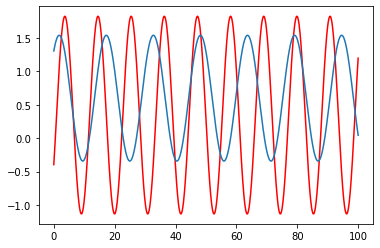

In [61]:
EPOCHS = 5

for epoch in range(EPOCHS):
    #for xi, yi in zip(x,y):
    train_loss.reset_states()
    train_sin(x, y)
    break
    #print(model.train)
    
# for epoch in range(EPOCHS):
#     train_loss.reset_states()
#     train_amp(x, y)
    
y_predicted = model(x)
    
plt.plot(x, y_predicted.numpy(), c='r')
plt.plot(x, y)

In [64]:
with tf.GradientTape() as tape:
    predictions = model(x)
    loss = loss_object(y, predictions)

gradients = tape.gradient(loss, model.trainable_variables)

In [66]:
for grad in gradients:
    print(grad.numpy())

[-3.2098541]
[-0.04022638]
[-1.2693416]
[-0.14067653]


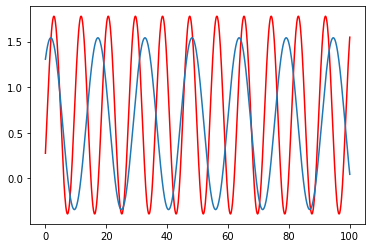

In [68]:
for epoch in range(1):
    train_loss.reset_states()
    train_sin(x, y)
    
y_predicted = model(x)
    
plt.plot(x, y_predicted.numpy(), c='r')
plt.plot(x, y)

In [82]:
model = Sin_Model(name='sin')

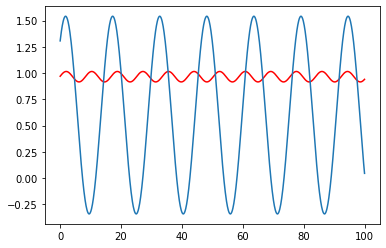

In [84]:
%matplotlib inline 
from IPython import display

optimizer = tf.keras.optimizers.Adam(learning_rate=.001)

train_loss = tf.keras.metrics.Mean(name='train_loss')

@tf.function
def train_sin(x, y):

    with tf.GradientTape() as tape:
        predictions = model(x)

        loss = loss_object(y, predictions)

    gradients = tape.gradient(loss, model.trainable_variables)
    print(gradients)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    train_loss(loss)

for epoch in range(1000):
    train_loss.reset_states()
    train_sin(x, y)
    
    y_predicted = model(x)
    
    display.clear_output(wait=True)
    plt.clf()
    plt.plot(x, y_predicted.numpy(), c='r')
    plt.plot(x, y)
    plt.pause(.02)

trained
<tf.Variable 'b1:0' shape=(1,) dtype=float32, numpy=array([-0.5845377], dtype=float32)>
<tf.Variable 'b2:0' shape=(1,) dtype=float32, numpy=array([-3.0732212], dtype=float32)>
<tf.Variable 'b1:0' shape=(1,) dtype=float32, numpy=array([0.01198893], dtype=float32)>
<tf.Variable 'b2:0' shape=(1,) dtype=float32, numpy=array([0.751782], dtype=float32)>


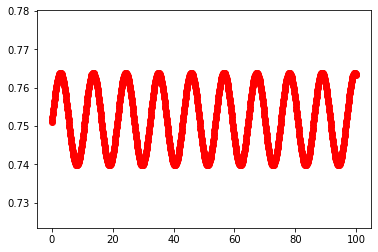

In [5]:
EPOCHS = 2000
for epoch in range(EPOCHS):
        # Reset the metrics at the start of the next epoch
        train_loss.reset_states()

        train_step(x, y)
        #bar()
    #template = 'Epoch {}, Loss: {}'
#     print(template.format(epoch + 1,
#                             train_loss.result()))

y_predicted = model(x)

print('trained')
for var in model.trainable_variables:
    print(var)
    
plt.scatter(x, y_predicted.numpy()[0], c='r');

In [6]:
print('hello')

hello


In [4]:
x = np.linspace(0, 100, 1000)

In [5]:
slope = np.random.normal(10)
intercept = np.random.normal(5)

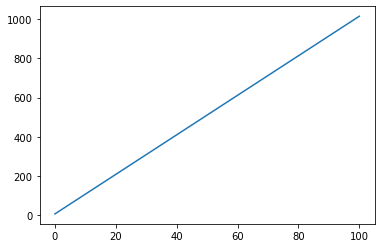

In [6]:
y = slope * x + intercept

plt.plot(x, y)

Here we have a line, the most basica of all fundamental units. 

In [7]:
x = tf.constant([x.astype('float32')])
y = tf.constant([y.astype('float32')])

In [37]:
w = tf.Variable(tf.random.normal((3, 2)), name='w')
b = tf.Variable(tf.zeros(2, dtype=tf.float32), name='b')
x = [[1., 2., 3.]]

with tf.GradientTape(persistent=True) as tape:
  y = x @ w + b
  loss = tf.reduce_mean(y**2)

In [41]:
w

<tf.Variable 'w:0' shape=(3, 2) dtype=float32, numpy=
array([[ 0.04814232, -0.6686567 ],
       [ 1.1442899 , -1.4148407 ],
       [ 0.08503401,  0.28954738]], dtype=float32)>

In [42]:
b

<tf.Variable 'b:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>

In [43]:
x

[[1.0, 2.0, 3.0]]

In [44]:
x @ w + b

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[ 2.591824 , -2.6296961]], dtype=float32)>

In [38]:
[dl_dw, dl_db] = tape.gradient(loss, [w, b])

In [39]:
dl_dw

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 2.591824 , -2.6296961],
       [ 5.183648 , -5.2593923],
       [ 7.775472 , -7.8890886]], dtype=float32)>

In [40]:
dl_db

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 2.591824 , -2.6296961], dtype=float32)>

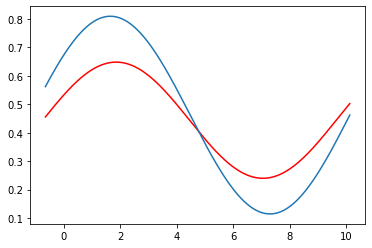

In [122]:
x = np.linspace(0, 100, 1000)

A = np.random.uniform()
B = np.random.uniform()
C = np.random.uniform()
D = np.random.uniform()


# 0 -> - B
# 2pi -> (2pi - B) / C
x = np.linspace(-B, (2*np.pi - B) / C, 1000)
y = A*np.sin((C*x) + B) + D
x = tf.constant(x.astype('float32'))
y = tf.constant(y.astype('float32'))


class Addition(tf.Module):
    def __init__(self, inputs, name=None):
        super().__init__(name=name)
        self.b_1 = tf.Variable(tf.random.normal([inputs]), name='b1')
        self.b_2 = tf.Variable(tf.random.normal([inputs]), name='b2')
    def __call__(self, x):
        out = tf.math.multiply(x, self.b_1) + self.b_2
        return out

class Sinusoid(tf.Module):
    def __init__(self, inputs, name=None):
        super().__init__(name=name)
    def __call__(self, x):
        sine = tf.math.sin(x)
        return sine
    
class Sin_Model(tf.Module):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.add_1 = Addition(inputs=1)
        self.sin_1 = Sinusoid(inputs=1)
        self.add_2 = Addition(inputs=1)
        
    def __call__(self, x):
        x = self.add_1(x)
        x = self.sin_1(x)
        x = self.add_2(x)
        return x
        

model = Sin_Model(name='sin')
#print(tf.keras.losses.mean_squared_error(y, model(x)))
loss_object = tf.keras.losses.MeanSquaredError()

optimizer = tf.keras.optimizers.Adam(learning_rate=.01)

train_loss = tf.keras.metrics.Mean(name='train_loss')

@tf.function
def train_1(x, y):

    with tf.GradientTape() as tape:
        predictions = model(x)

        loss = loss_object(y, predictions)

    dw = tape.gradient(loss, model.trainable_variables[0])
    learning_rate = 0.01
    model.trainable_variables[0].assign_sub(learning_rate * dw)
    train_loss(loss)

@tf.function
def train_2(x, y):

    with tf.GradientTape() as tape:
        predictions = model(x)

        loss = loss_object(y, predictions)

    dw = tape.gradient(loss, model.trainable_variables[1])
    learning_rate = 0.01
    model.trainable_variables[1].assign_sub(learning_rate * dw)
    train_loss(loss)

@tf.function
def train_3(x, y):

    with tf.GradientTape() as tape:
        predictions = model(x)

        loss = loss_object(y, predictions)

    dw = tape.gradient(loss, model.trainable_variables[2])
    learning_rate = 0.01
    model.trainable_variables[2].assign_sub(learning_rate * dw)
    train_loss(loss)

@tf.function
def train_4(x, y):

    with tf.GradientTape() as tape:
        predictions = model(x)

        loss = loss_object(y, predictions)

    dw = tape.gradient(loss, model.trainable_variables[3])
    learning_rate = 0.01
    model.trainable_variables[3].assign_sub(learning_rate * dw)
    train_loss(loss)


for epoch in range(250):
    for func in [train_1,train_2,train_3,train_4]:
        train_loss.reset_states()
        func(x, y)

        y_predicted = model(x)

        display.clear_output(wait=True)
        plt.clf()
        plt.plot(x, y_predicted.numpy(), c='r')
        plt.plot(x, y)
        plt.pause(.02)

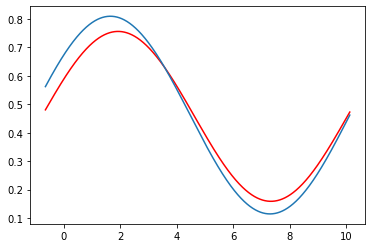

In [123]:
for epoch in range(100):
    for func in [train_1,train_2,train_3,train_4]:
        train_loss.reset_states()
        func(x, y)

        y_predicted = model(x)

        display.clear_output(wait=True)
        plt.clf()
        plt.plot(x, y_predicted.numpy(), c='r')
        plt.plot(x, y)
        plt.pause(.02)

In [124]:
with tf.GradientTape() as tape:
    predictions = model(x)

    loss = loss_object(y, predictions)

gradients = tape.gradient(loss, model.trainable_variables)

In [127]:
gradients

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.00060846], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.00800813], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.0541626], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.00438659], dtype=float32)>)

In [133]:
max(gradients).numpy()

array([0.00060846], dtype=float32)

In [128]:
gradients[0] == max(gradients)

<tf.Tensor: shape=(1,), dtype=bool, numpy=array([ True])>

In [ ]:
@tf.function
def train_iv(x, y):
    with tf.GradientTape() as tape:
        predictions = model(x)

        loss = loss_object(y, predictions)

    gradients = tape.gradient(loss, model.trainable_variables)
    learning_rate = 0.01
    tm = max(gradients)
    for i, grad in gradients:
        if grad == tm:
            v = i
    model.trainable_variables[v].assign_sub(learning_rate * gradients[v])
    train_loss(loss)

In [105]:
optimizer = tf.keras.optimizers.Adam(learning_rate=.01)

@tf.function
def train_sin(x, y):

    with tf.GradientTape() as tape:
        predictions = model(x)

        loss = loss_object(y, predictions)

    gradients = tape.gradient(loss, model.trainable_variables)
    print(gradients)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    train_loss(loss)

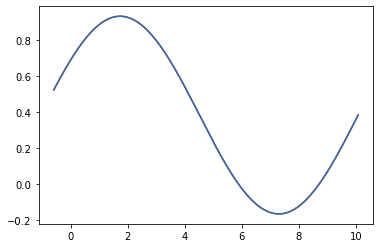

In [108]:
for epoch in range(100):
    train_loss.reset_states()
    train_sin(x, y)
    
    y_predicted = model(x)
    
    display.clear_output(wait=True)
    plt.clf()
    plt.plot(x, y_predicted.numpy(), c='r')
    plt.plot(x, y)
    plt.pause(.001)

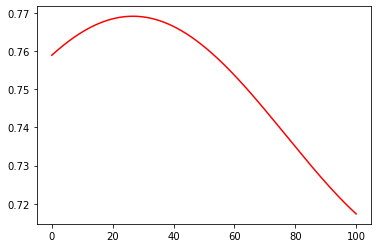

In [89]:
plt.plot(x, y_predicted.numpy(), c='r')

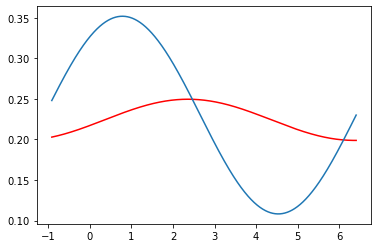

In [138]:
x = np.linspace(0, 100, 1000)

A = np.random.uniform()
B = np.random.uniform()
C = np.random.uniform()
D = np.random.uniform()


# 0 -> - B
# 2pi -> (2pi - B) / C
x = np.linspace(-B, (2*np.pi - B) / C, 1000)
y = A*np.sin((C*x) + B) + D
x = tf.constant(x.astype('float32'))
y = tf.constant(y.astype('float32'))


class Addition(tf.Module):
    def __init__(self, inputs, name=None):
        super().__init__(name=name)
        self.b_1 = tf.Variable(tf.random.normal([inputs]), name='b1')
        self.b_2 = tf.Variable(tf.random.normal([inputs]), name='b2')
    def __call__(self, x):
        out = tf.math.multiply(x, self.b_1) + self.b_2
        return out

class Sinusoid(tf.Module):
    def __init__(self, inputs, name=None):
        super().__init__(name=name)
    def __call__(self, x):
        sine = tf.math.sin(x)
        return sine
    
class Sin_Model(tf.Module):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.add_1 = Addition(inputs=1)
        self.sin_1 = Sinusoid(inputs=1)
        self.add_2 = Addition(inputs=1)
        
    def __call__(self, x):
        x = self.add_1(x)
        x = self.sin_1(x)
        x = self.add_2(x)
        return x
        

model = Sin_Model(name='sin')
#print(tf.keras.losses.mean_squared_error(y, model(x)))
loss_object = tf.keras.losses.MeanSquaredError()

optimizer = tf.keras.optimizers.Adam(learning_rate=.1)

train_loss = tf.keras.metrics.Mean(name='train_loss')

#@tf.function
def train_iv(x, y):
    with tf.GradientTape() as tape:
        predictions = model(x)

        loss = loss_object(y, predictions)

    gradients = tape.gradient(loss, model.trainable_variables)
    learning_rate = 0.01
    check = 0
    for i, grad in enumerate(gradients):
        val = grad.numpy()
        if np.abs(val) > check:
            check = val
            v = i
    model.trainable_variables[v].assign_sub(learning_rate * gradients[v])
    train_loss(loss)

for epoch in range(1000):
    train_loss.reset_states()
    train_iv(x, y)

    y_predicted = model(x)

    display.clear_output(wait=True)
    plt.clf()
    plt.plot(x, y_predicted.numpy(), c='r')
    plt.plot(x, y)
    plt.pause(.02)

In [144]:
optimizer = tf.keras.optimizers.Adam(learning_rate=100000000000)

train_loss = tf.keras.metrics.Mean(name='train_loss')

#@tf.function
def train_iv(x, y):
    with tf.GradientTape() as tape:
        predictions = model(x)

        loss = loss_object(y, predictions)

    gradients = tape.gradient(loss, model.trainable_variables)
    learning_rate = 0.01
    check = 0
    for i, grad in enumerate(gradients):
        val = grad.numpy()
        if np.abs(val) > check:
            check = val
            v = i
    model.trainable_variables[v].assign_sub(learning_rate * gradients[v])
    train_loss(loss)

for epoch in range(1000):
    train_loss.reset_states()
    train_iv(x, y)

    y_predicted = model(x)

    display.clear_output(wait=True)
    plt.clf()
    plt.plot(x, y_predicted.numpy(), c='r')
    plt.plot(x, y)
    plt.pause(.02)

KeyboardInterrupt: 

In [145]:
with tf.GradientTape() as tape:
    predictions = model(x)

    loss = loss_object(y, predictions)

gradients = tape.gradient(loss, model.trainable_variables)
print(gradients)

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.00872996], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.00386703], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.00874151], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.00819105], dtype=float32)>)
